<div style="border:solid blue 2px; padding: 20px">
<b>Привет, Илья!👋</b>

Меня зовут Арсений, и я буду ревьюером твоего проекта. Если не против, то давай общаться на «ты» :) Но мы легко можем перейти на «вы», если тебе так будет комфортнее. 

Моя основная цель — помочь тебе стать крутым специалистом, поэтому давай разберем твой проект и попробуем сделать его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но исправлять их необязательно. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю то, что сделано отлично. </div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Если нужно удалить часть кода или целую ячейку, то лучше просто закомментируй.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так. </div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошее вступление. Сюда еще можно добавить содержание и описание данных. Тогда, например, заказчику или проверяющему будет проще сориентироваться в твоем проекте. </div>

## Откройте и изучите файл

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from joblib import dump

df = pd.read_csv('/datasets/users_behavior.csv')

display(df.head(5))
df.info()
display(df.isna().sum())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Здорово, что все импорты находятся в одной ячейке, но блок загрузки библиотек лучше размещать в отдельной от остального кода ячейке. Такой подход позволит улучшить читаемость кода, снизит время поиска ошибок (если они есть) и исключит повторное выполнение кода. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Данные загружены корректно. Есть первичный анализ данных.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Рекомендую после каждого раздела писать промежуточный вывод о полученных результатах. </div>

## Разбейте данные на выборки

In [81]:
df_train, df_valtest = train_test_split(df, train_size=0.70, random_state=12345) # разделяем данные на обучающую 
# и валидационную выборки >

features = df.drop(['is_ultra'], axis=1)  # создадим признаки
target = df['is_ultra']   # целевой показатель

features_train = df_train.drop(['is_ultra'], axis=1)  # создадим признаки тренировочные
target_train = df_train['is_ultra']  # целевой показатель тренировочный

df_test, df_valid = train_test_split(df_valtest, test_size=0.50, random_state=12345)

features_valid = df_valid.drop(['is_ultra'], axis=1)  
target_valid = df_valid['is_ultra'] 

features_test = df_test.drop(['is_ultra'], axis=1)  
target_test = df_test['is_ultra']

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Данные следует разделять на 3 выборки: обучающую, валидационную и тестовую. Последнюю мы используем как «слепую» для приближения финального тестирования к реальным данным. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2 ⚠️:</b> Исправлено. Только можно спокойно удалить скрочки

    features = df.drop(['is_ultra'], axis=1)  # создадим признаки
    target = df['is_ultra']   # целевой показатель

</div>

## Исследуйте модели

In [82]:
for depth in range(1, 4):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # обучаем модель с заданной глубиной дерева 4
    model.fit(features_train, target_train) # обучаем модель
    predictions_valid = model.predict(features_valid) # находим предсказания по выборке
    result = accuracy_score(target_valid, predictions_valid) # считаем качество модели
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 
    
    
    model = DecisionTreeClassifier(random_state=12399, max_depth = depth)
model.fit(features_train, target_train) # обучаем модель на тренировочной выборке

predictions_test = model.predict(features_test) # находим предсказания по выборке
result = accuracy_score(target_test, predictions_test) # считаем качество модели
print("max_depth =", depth, ": ", end='')
print(accuracy_score(target_test, predictions_test))  

max_depth = 1 : 0.7412008281573499
max_depth = 2 : 0.782608695652174
max_depth = 3 : 0.7888198757763976
max_depth = 3 : 0.7863070539419087


**Исследуем модель дерево решений.

Настраиваем гиперпараметры дерева решений (изначально пробовал считать до 6 но остановился на 4, после 4-х параметр снижается).
Наилучшая модель номер три

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Чтобы текст отображался жирным шрифтом, нужно перед и после него поставить **, а у тебя практически везде они стоят только в самом начале. </div>

In [83]:
best_model = None
best_result = 0
for est in range(1, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучаем модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result:
        best_model = model# сохраняем наилучшую модель
        best_result = result#  сохраняем наилучшее значение метрики accuracy на валидационных данных

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

Accuracy наилучшей модели на валидационной выборке: 0.782608695652174


**Исследуем модель случайный лес.**

Используем случайный лес, получаем выборку 0.782


In [84]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
predictions = model.predict(features_valid) 
model.score(features_valid, target_valid) 

print('Логистическая регресия', model.score(features_valid, target_valid))

Логистическая регресия 0.7018633540372671


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Обучать модели следует на тренировочной выборке, а предсказывать до финального тестирования - на валидационной. Тут ты обучаешься и делаешь предсказания на всем датасете. Исправь это, пожалуйста.  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b> Теперь все так. </div>

**Исследуем модель логистическая регрессия.**

Логистическая регресия 0.7479775980087119

<div class="alert alert-warning">
<b>Комментарий ревьюера v2 ⚠️:</b> У нее получится чуть другой скор. </div>

In [85]:
print(f"Дерево решений: {accuracy_score(target_valid, predictions_valid)}")
print(f"Cлучайный лес: {best_result}")
print(f"Логистическая регресия: {model.score(features, target)}") 

Дерево решений: 0.7888198757763976
Cлучайный лес: 0.782608695652174
Логистическая регресия: 0.70130678282514


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Намного проще скор для каждой модели сохранить в отдельные перменные, например, tree_accuracy, forest_accuracy, logreg_accuracy. </div>

**Вывод**
Дерево решений показывает наиболее высокий уровень предсказаний

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Совершенно верно. </div>

## Проверьте модель на тестовой выборке

In [86]:

model = DecisionTreeClassifier(random_state=12399, max_depth = depth)
model.fit(features_train, target_train) # обучаем модель на тренировочной выборке

predictions_test = model.predict(features_test) # находим предсказания по выборке
result = accuracy_score(target_test, predictions_test) # считаем качество модели
print("max_depth =", depth, ": ", end='')
print(accuracy_score(target_test, predictions_test))  

max_depth = 3 : 0.7863070539419087


**Вывод**

На тестовой выборке проверяем модель дерево решений так как у неё был лучший результат, и получаем результат предсказаний  ***0.7863070539419087*** что даже чуть меньше чем на тренировочно валидной выборках.

**Меня конечно смущает что пулучились одинаковые значения(**

**Исправить тестирование! 

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Для тестирования нужно выбрать только ОДНУ модель, которая лучше других показала себя на валидации. И, соответственно, делать предсказания уже на тестовой выборке.</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v2 ❌:</b> В тестировании не надо перебирать гиперпараметры, а нужно просто посчитать метрики на тестовой выборке для лучше модели, которые мы отобрали ранее на валидации. В реальности, мы же не можем посмортеть на реальные значения тестовых данных.  </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v3 ❌:</b> Процесс обучения никак не должен меняться, то есть обучать лучшую модель стоит на трейне, а не на тесте. Мы ведь не сможем в реальности обучить модель на тестовых данных, о которых не знаем практически ничего.  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v4 ✔️:</b> Тестирование выполнено корректно. </div>

## (бонус) Проверьте модели на адекватность

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75


**Вывод**

Доля правильных ответов моделей: 
    
Дерево решений: 0.7888198757763976
Cлучайный лес: 0.782608695652174
Логистическая регресия: 0.70130678282514
    
Наиболее адекватные предсказания мы получаеи от модели дерево решений, это видно по точности предсказания на валидационной и на тестовой выборке.   

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Хороший итоговый вывод. Но после всех исправлений результаты могут получиться другими, поэтому не забудь скорректировать все промежуточные и итоговые выводы. Из-за этого и поставил тут красный комментарий) </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v4 ✔️:</b> Вывод исправлен. </div>

<div style="border:solid blue 2px; padding: 20px">
<b>Итоговый комментарий ревьюера</b>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Мне очень понравилась твоя работа. Спасибо тебе большое, за хорошее оформление проекта.
Чувствуется уверенное знание материала и владение питоном в целом. 
</div>
<b>Но нужно кое-что поправить:</b>
<div class="alert alert-block alert-danger">
<ul>1) Разделить данные на 3 выборки.</ul>
<ul>2) Не обучать и не предсказывать на всем датасете.</ul>
<ul>3) Исправить тестирование.</ul>
<ul>4) Скорректировать выводы после исправлений.</ul>
</div>

<b>Осталось совсем немного, буду ждать твою работу на повторное ревью 🙂</b></div>

<div style="border:solid blue 2px; padding: 20px">
<b>Итоговый комментарий ревьюера v2</b>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Осталось совсем чуть-чуть. 
</div>
<b>Нужно поправить:</b>
<div class="alert alert-block alert-danger">
<ul>1) Исправить тестирование.</ul>
<ul>2) Скорректировать выводы после исправлений.</ul>
</div>

<div style="border:solid blue 2px; padding: 20px">
<b>Итоговый комментарий ревьюера v3</b>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Осталось немного. 
</div>
<b>Нужно поправить:</b>
<div class="alert alert-block alert-danger">
<ul>1) Модель для тестирования обучать на трейне.</ul>
</div>

<div style="border:solid blue 2px; padding: 20px">
<b>Итоговый комментарий ревьюера v4</b>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Все недочеты исправлены. Проект принят, поздравляю🥳
</div>

<b>Желаю успехов и удачи!</b></div>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor

In [88]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [89]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [91]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [93]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [94]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d %H:%M:%S')
train_df.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [95]:
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y-%m-%d %H:%M:%S')
test_df.dtypes

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [96]:
full_df['date'] = pd.to_datetime(full_df['date'], format='%Y-%m-%d %H:%M:%S')
full_df.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [97]:
cnt = 0
for df in [train_df, test_df, full_df]:
    cnt += 1
    print(f'\nКоличество явных дубликатов в {cnt}-ом датасете - ',df.duplicated().sum())


Количество явных дубликатов в 1-ом датасете -  0

Количество явных дубликатов в 2-ом датасете -  0

Количество явных дубликатов в 3-ом датасете -  0


In [98]:
size_of_train_df_before = train_df.shape
size_of_test_df_before = test_df.shape
size_of_full_df_before = full_df.shape
train_df = train_df.ffill(axis=0)
test_df = test_df.ffill(axis=0)
full_df = full_df.ffill(axis=0)
print(f'\nРазмер тренировочной выборки - {size_of_train_df_before} и количество строк без пропусков - {len(train_df.notna())}')
print(f'\nРазмер тестовой выборки - {size_of_test_df_before} и количество строк без пропусков - {len(test_df.notna())}')
print(f'\nРазмер исходной выборки - {size_of_full_df_before} и количество строк без пропусков - {len(full_df.notna())}')


Размер тренировочной выборки - (14149, 87) и количество строк без пропусков - 14149

Размер тестовой выборки - (5290, 53) и количество строк без пропусков - 5290

Размер исходной выборки - (19439, 87) и количество строк без пропусков - 19439


In [99]:
c = train_df['rougher.output.concentrate_au']
f = train_df['rougher.input.feed_au']
t = train_df['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100

In [100]:

print('MAE -', mean_absolute_error(train_df['rougher.output.recovery'], recovery))

MAE - 9.73512347450521e-15


In [101]:

missed_signs = set(train_df.columns) - set(test_df.columns)

In [102]:

missed_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [103]:
print('\nКоличество отсутствующих признаков -', len(missed_signs))


Количество отсутствующих признаков - 34


In [104]:
dict_with_name_of_values = {'final': 'финальные характеристики',
                           'primary_cleaner': 'первичная очистка',
                           'secondary_cleaner': 'вторичная очистка',
                           'input': 'параметры сырья',
                           'output': 'параметры продукта',
                           'rougher': 'флотация',
                           'state': 'параметры, характеризующие текущее состояние этапа',
                           'calculation': 'расчётные характеристики'}

In [105]:
dict_for_missed_signs = {}
for sign in missed_signs:
    list_with_words = sign.split('.')
    stage = list_with_words[0]+'-'+list_with_words[1]
    if stage in dict_for_missed_signs:
        dict_for_missed_signs[stage].append(list_with_words[2])
    elif stage not in dict_for_missed_signs:
        dict_for_missed_signs[stage] = [list_with_words[2]]
for key in dict_for_missed_signs.keys():
    split_key = key.split('-')
    print('='*90)
    print(f'ДЛЯ ЭТАПА "{(dict_with_name_of_values[split_key[0]]).upper()}" С ОПЦИЕЙ "{(dict_with_name_of_values[split_key[1]]).upper()}" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:')
    print('='*90)
    for elem in dict_for_missed_signs[key]:
        print(f' - {elem}')

ДЛЯ ЭТАПА "ФИНАЛЬНЫЕ ХАРАКТЕРИСТИКИ" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_pb
 - concentrate_pb
 - tail_au
 - concentrate_au
 - tail_ag
 - recovery
 - concentrate_ag
 - concentrate_sol
 - tail_sol
ДЛЯ ЭТАПА "ПЕРВИЧНАЯ ОЧИСТКА" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_au
 - concentrate_pb
 - concentrate_ag
 - concentrate_au
 - tail_ag
 - concentrate_sol
 - tail_pb
 - tail_sol
ДЛЯ ЭТАПА "ФЛОТАЦИЯ" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - concentrate_ag
 - tail_ag
 - concentrate_sol
 - recovery
 - tail_sol
 - tail_pb
 - concentrate_au
 - concentrate_pb
 - tail_au
ДЛЯ ЭТАПА "ВТОРИЧНАЯ ОЧИСТКА" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_au
 - tail_ag
 - tail_pb
 - tail_sol
ДЛЯ ЭТАПА "ФЛОТАЦИЯ" С ОПЦИЕЙ "РАСЧЁТНЫЕ ХАРАКТЕРИСТИКИ" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - floatbank10_sulfate_to_au_feed
 - sulfate_to_au_concentrate
 - floatbank11_sulfate_to_au_feed
 - au_pb_ratio


In [106]:
test_df = test_df.merge(full_df.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [107]:

train_df = train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)

In [108]:

print('\nРазмер тестовой выборки - {} | Размер тренировочной выборки - {}'.format(test_df.shape, train_df.shape))


Размер тестовой выборки - (5290, 54) | Размер тренировочной выборки - (14149, 86)


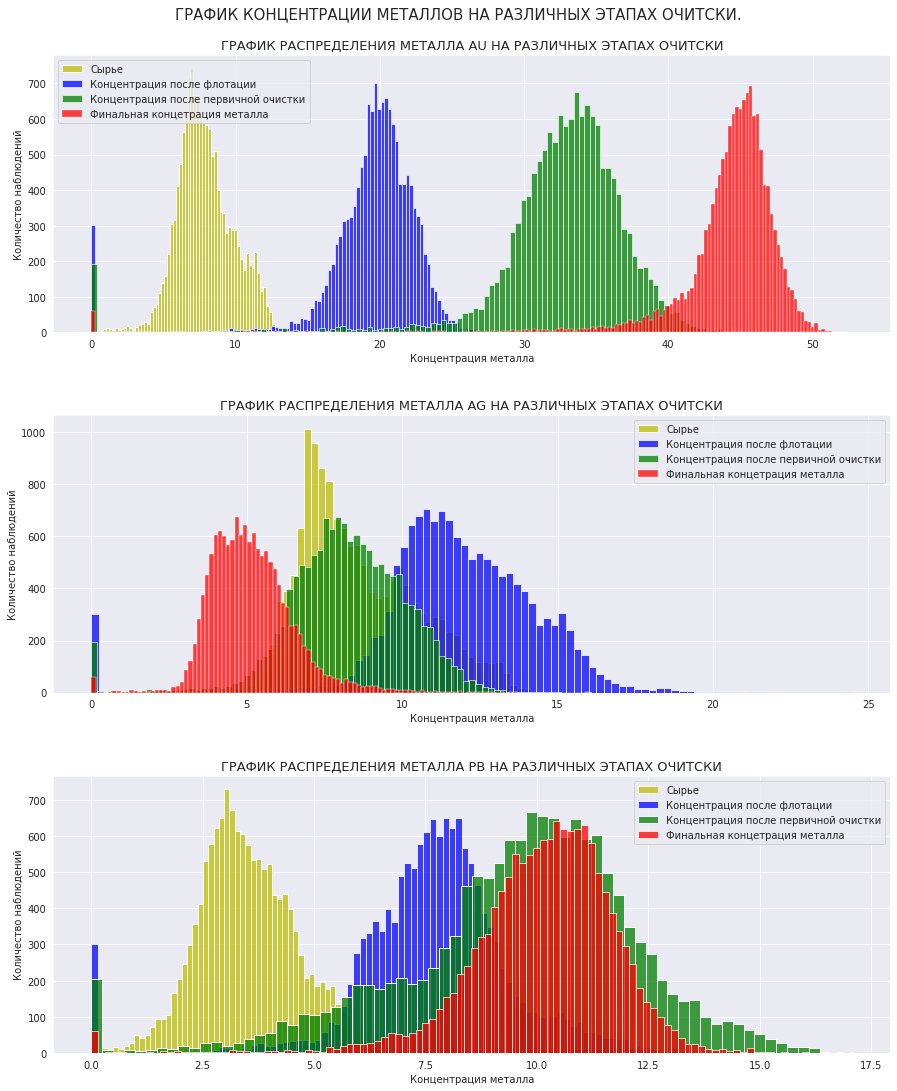

In [109]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИК КОНЦЕНТРАЦИИ МЕТАЛЛОВ НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ.', fontsize=15)
for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ МЕТАЛЛА {str(metal).upper()} НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
    sns.set_style('darkgrid')
    sns.histplot(train_df[f'rougher.input.feed_{metal}'], color='y', label='Сырье', kde=False)
    sns.histplot(train_df[f'rougher.output.concentrate_{metal}'], color='b', label='Концентрация после флотации', kde=False)
    sns.histplot(train_df[f'primary_cleaner.output.concentrate_{metal}'], color='g', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(train_df[f'final.output.concentrate_{metal}'], color='r', label='Финальная концетрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

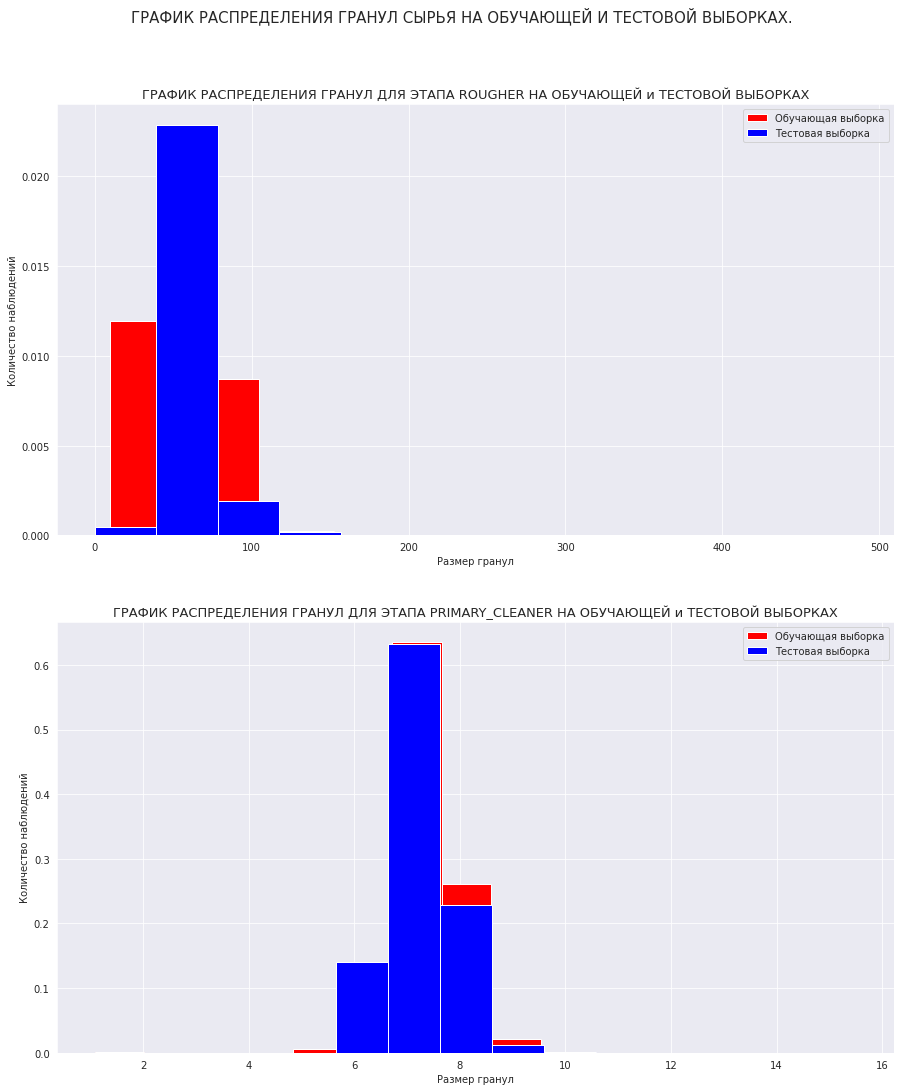

In [110]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.90, wspace=0.2, hspace=0.2)
plt.suptitle('ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ СЫРЬЯ НА ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРКАХ.', fontsize=15)
for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ ДЛЯ ЭТАПА {str(stage).upper()} НА ОБУЧАЮЩЕЙ и ТЕСТОВОЙ ВЫБОРКАХ', fontsize=13)
    sns.set_style('darkgrid')
    plt.hist(train_df[f'{stage}.input.feed_size'], color='r', label='Обучающая выборка', density=True)
    plt.hist(test_df[f'{stage}.input.feed_size'], color='b', label='Тестовая выборка', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

In [111]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_primary_cleaner_output = 0
sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += train_df[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += train_df[f'rougher.output.concentrate_{metal}']
#     sum_concentrate_of_primary_cleaner_output += full_df[f'primary_cleaner.output.concentrate_{metal}']
    sum_concentrate_of_final_output += train_df[f'final.output.concentrate_{metal}']

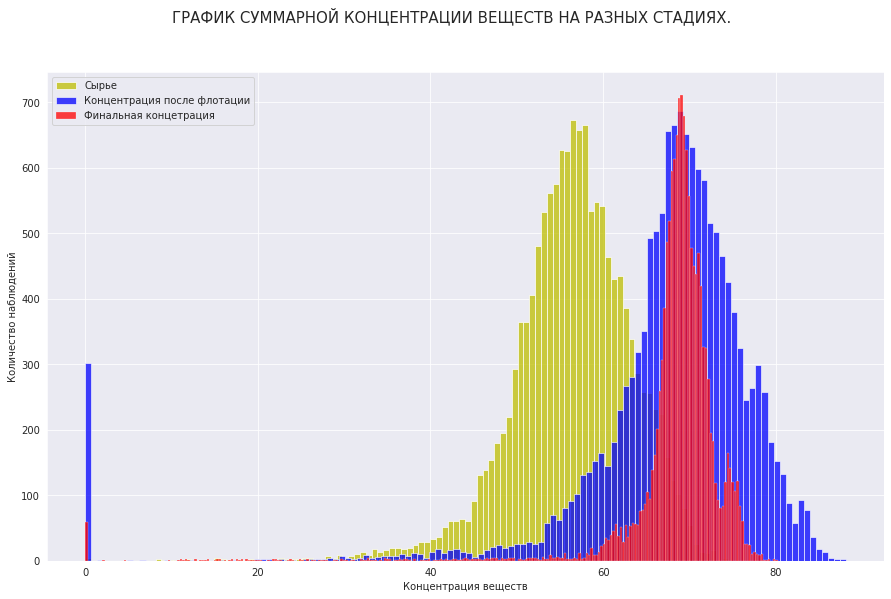

In [112]:
plt.figure(figsize=[15, 9])
plt.suptitle('ГРАФИК СУММАРНОЙ КОНЦЕНТРАЦИИ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ.', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(sum_concentrate_of_rougher_input, color='y', label='Сырье', kde=False)
sns.histplot(sum_concentrate_of_rougher_output, color='b', label='Концентрация после флотации', kde=False)
# sns.histplot(sum_concentrate_of_primary_cleaner_output, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(sum_concentrate_of_final_output, color='r', label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();

In [113]:
train_df = train_df[(train_df['rougher.output.concentrate_au'] != 0) & (train_df['rougher.output.concentrate_ag'] != 0) & (train_df['rougher.output.concentrate_pb'] != 0) & (train_df['rougher.output.concentrate_sol'] != 0)]
train_df = train_df[(train_df['final.output.concentrate_au'] != 0) & (train_df['final.output.concentrate_ag'] != 0) & (train_df['final.output.concentrate_pb'] != 0) & (train_df['final.output.concentrate_sol'] != 0)]

full_df = full_df[(full_df['rougher.output.concentrate_au'] != 0) & (full_df['rougher.output.concentrate_ag'] != 0) & (full_df['rougher.output.concentrate_pb'] != 0) & (full_df['rougher.output.concentrate_sol'] != 0)]
full_df = full_df[(full_df['final.output.concentrate_au'] != 0) & (full_df['final.output.concentrate_ag'] != 0) & (full_df['final.output.concentrate_pb'] != 0) & (full_df['final.output.concentrate_sol'] != 0)]

In [114]:
signs_for_delete_without_target_signs = missed_signs - set(['rougher.output.recovery','final.output.recovery'])

In [115]:
print('\nКоличество признаков для удаления из тренировочной выборки -', len(signs_for_delete_without_target_signs))


Количество признаков для удаления из тренировочной выборки - 32


In [116]:
train_df = train_df.drop(columns=signs_for_delete_without_target_signs, axis=1)

In [117]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [118]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

In [119]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

In [120]:
features_for_train_df = train_df.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_train_df = train_df['rougher.output.recovery']
target_for_final_on_train_df = train_df['final.output.recovery']

In [121]:
dct_with_scores = {}

In [122]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_for_train_df,
                          target_for_rougher_on_train_df,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_for_train_df,
                        target_for_final_on_train_df,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 1.42 s, sys: 1.7 s, total: 3.12 s
Wall time: 3.13 s


In [123]:
state = RandomState(12345)

In [124]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_for_train_df,
                              target_for_rougher_on_train_df,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=state)
    smape_final = cross_val_score(model_dt_final, 
                                  features_for_train_df,
                                  target_for_final_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

CPU times: user 23.1 s, sys: 132 ms, total: 23.2 s
Wall time: 23.3 s


In [125]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_for_train_df,
                                  target_for_rougher_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_final = cross_val_score(model_rf_final,
                                features_for_train_df,
                                target_for_final_on_train_df,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

CPU times: user 12min 50s, sys: 3.22 s, total: 12min 53s
Wall time: 12min 54s


In [126]:
for key in dct_with_scores.keys():
    print(f'\nМОДЕЛЬ {str(key).upper()} С РЕЗУЛЬТАТОМ - {dct_with_scores[key][0]}')


МОДЕЛЬ LR С РЕЗУЛЬТАТОМ - 10.059261443482796

МОДЕЛЬ DT С РЕЗУЛЬТАТОМ - 8.925785452030949

МОДЕЛЬ RF С РЕЗУЛЬТАТОМ - 8.529258429567625


In [127]:
print('\nЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - {}, MAX_DEPTH - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))


ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - 10, MAX_DEPTH - 4


In [128]:
features_for_test_df = test_df.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_test_df = test_df['rougher.output.recovery']
target_for_final_on_test_df = test_df['final.output.recovery']

In [129]:
model_for_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
predicted_rougher = model_for_test_rougher.predict(features_for_test_df)

model_for_test_final = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_final.fit(features_for_train_df, target_for_final_on_train_df)
predicted_final = model_for_test_final.predict(features_for_test_df)

smape_for_test_rougher = get_smape(target_for_rougher_on_test_df, predicted_rougher)
smape_for_test_final = get_smape(target_for_final_on_test_df, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

In [130]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
dummy_regr_for_final.fit(features_for_train_df, target_for_final_on_train_df)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_for_test_df)
dummy_predicted_final = dummy_regr_for_final.predict(features_for_test_df)

smape_for_const_rougher = get_smape(target_for_rougher_on_test_df, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_for_final_on_test_df, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

In [131]:
print(f'\nПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')


ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.82146839182027
